# DSC 630 Course Project

### DSC630 - Predictive Analytics

### By Katie Briggs, Shefers Sarkar, Mario Aldana

### Platform version:

`Python 3.7.4`

`Anaconda Navigator 1.9.7`

`Jupyter Notebook 5.5.0`



### Environment:


In [1]:
# Libraries,

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline


C:\Users\shefe\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Configuration options to improve visibility,

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Load Tax dataset,

df = pd.read_csv("18zpallagi.csv")


### Cleaning Data:


In [4]:
# Drop variables.

# We will drop columns which are not required in our models.
# Because Python keep memory at high watermark, we will modify our dataframe with inplace=True instead of create copies:

df.drop(['STATEFIPS', 'PREP', 'DIR_DEP', 'TOTAL_VITA', 'VITA', 'TCE', 'VITA_EIC', 'RAC', 'N00300', 'A00300', 'N00600', 
         'A00600', 'N00650', 'A00650', 'N00700', 'A00700', 'N00900', 'A00900', 'N01000', 'A01000', 'N01750', 'A01750', 
         'N02300', 'A02300', 'N02500', 'A02500', 'N26270', 'A26270', 'N02900', 'A02900', 'N03220', 'A03220', 'N03300', 
         'A03300', 'N03270', 'A03270', 'N03150', 'A03150', 'N03210', 'A03210', 'N04450', 'A04450', 'N04100', 'A04100', 
         'N04200', 'A04200', 'N04470', 'A04470', 'A00101', 'N17000', 'A17000', 'N18425', 'A18425', 'N18450', 'A18450', 
         'N18500', 'A18500', 'N18800', 'A18800', 'N18460', 'A18460', 'N18300', 'A18300', 'N19300', 'A19300', 'N19500', 
         'A19500', 'N19530', 'A19530', 'N19570', 'A19570', 'N19700', 'A19700', 'N20950', 'A20950', 'N04475', 'A04475', 
         'N04800', 'A04800', 'N05800', 'A05800', 'N09600', 'A09600', 'N05780', 'A05780', 'N07300', 'A07300', 'N07230', 
         'A07230', 'N07240', 'A07240', 'N07225', 'A07225', 'N07260', 'A07260', 'N09400', 'A09400', 'N85770', 'A85770', 
         'N85775', 'A85775', 'N09750', 'A09750', 'N59660', 'A59660', 'N59720', 'A59720', 'N11070', 'A11070', 'N10960', 
         'A10960', 'N11560', 'A11560', 'N06500', 'A06500', 'N85530', 'A85530', 'N85300', 'A85300', 'N11901', 'A11901', 
         'N11902', 'A11902', 'N12000', 'A12000'], axis=1, inplace=True)


In [5]:
# Change features names,

df.columns = ['state', 'zipcode', 
              'agi_range', 'returns_cnt', 
              'single', 'joint', 'head', 
              'efile', 'paper', 
              'exemption_cnt', 'dependent_cnt', 
              'elderly', 
              'agi', 
              'withincome_cnt', 'income_amount',
              'withwages_cnt', 'wages_amount',
              'farmer',
              'withcredits_cnt', 'credits_amount', 
              'withchildcredits_cnt', 'childcredits_amount', 
              'withpayments_cnt', 'payments_amount', 
              'withliability_cnt', 'liability_amount', 
              'withoverpayment_cnt', 'overpayment_amount']

In [6]:
# Clean Nulls:

# There are not explicit Nulls values, although Nulls values were replaced by 0
# For example, there are observations where Zipcode is zero.

print(df.isnull().sum())

state                   0
zipcode                 0
agi_range               0
returns_cnt             0
single                  0
joint                   0
head                    0
efile                   0
paper                   0
exemption_cnt           0
dependent_cnt           0
elderly                 0
agi                     0
withincome_cnt          0
income_amount           0
withwages_cnt           0
wages_amount            0
farmer                  0
withcredits_cnt         0
credits_amount          0
withchildcredits_cnt    0
childcredits_amount     0
withpayments_cnt        0
payments_amount         0
withliability_cnt       0
liability_amount        0
withoverpayment_cnt     0
overpayment_amount      0
dtype: int64


In [7]:
# There are 306 observations without zipcode,

len(df.loc[df.zipcode == 0])

306

In [8]:
# We are going to mark these zipcodes with a tag, '99999'

df['zipcode'] = df['zipcode'].replace([0], 99999)

In [9]:
# Clean Continuous Variables:

# There are several main federal filing status in the dataset, such as:
##    Single,
##    Jointly (Married, Filing Jointly),
##    Head (Head of Household)

# There are other features, such as Farmer and Elderly:
# elderly variable is the number of elderly returns.
# farmer variable is the number of farmer returns.
# The dataset has these features. We want to create a feature with these variables but first all of
# we should to see if they are related.

# We will plot these variables plus the AGI variable. AGI stands for Adjusted Gross Income
# In the dataset, agi_range variable was categorized in several ranges:
##    1 = $1 under $25,000
##    2 = $25,000 under $50,000
##    3 = $50,000 under $75,000
##    4 = $75,000 under $100,000
##    5 = $100,000 under $200,000
##    6 = $200,000 or more#

# We are going to create two seaborn plots that will show the average the Farmer and Elderly by AGI,


<Figure size 432x288 with 0 Axes>

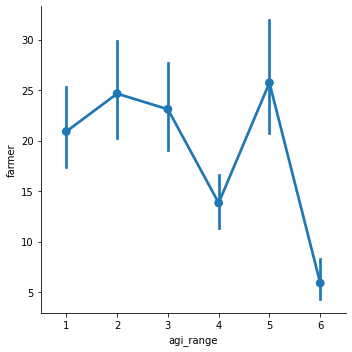

In [10]:
# Create two plots, one per each variable, farm and enderly.

for i, col in enumerate(['agi_range']):
    plt.figure(i)
    sns.catplot(x=col, y='farmer', data=df, kind='point', aspect=1)

# In this first plot, we can see the farmer average for each range of adjusted gross income (AGI)
# The bars correspond to the sample size at each range of AGI, larger bars indicates a smaller sample size.

# In the plot, we can see as taxpayer have more AGI, they are are less likely to be farmer.


<Figure size 432x288 with 0 Axes>

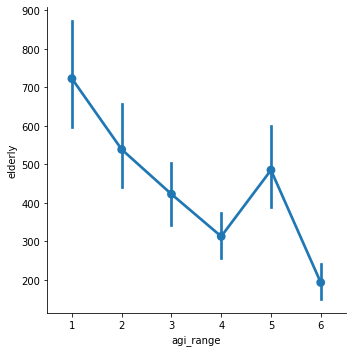

In [11]:
# In the second plot, we can see the elderly average for each range of adjusted gross income (AGI)
# In the plot, we can see as taxpayer have more AGI, they are are less likely to be elderly people.

for i, col in enumerate(['agi_range']):
    plt.figure(i)
    sns.catplot(x=col, y='elderly', data=df, kind='point', aspect=1)


In [12]:
# Both features, farmer and enderly have a similar trend where as taxpayers have more AGI, they are are less likely to be farmer or elderly.
# These variables are closely related, we are combine them into one feature called farmer_elderly

df['farmer_elderly'] = df['farmer'] + df['elderly']


In [13]:
# Drop previous continuous features, farmer and elderly,

df.drop(['farmer', 'elderly'], axis=1, inplace=True)


### Exploratory Analysis:


In [14]:
# Final dataset with data types,

df.head()

,state,zipcode,agi_range,returns_cnt,single,joint,head,efile,paper,exemption_cnt,dependent_cnt,agi,withincome_cnt,income_amount,withwages_cnt,wages_amount,withcredits_cnt,credits_amount,withchildcredits_cnt,childcredits_amount,withpayments_cnt,payments_amount,withliability_cnt,liability_amount,withoverpayment_cnt,overpayment_amount,farmer_elderly
0,AL,99999,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,1180240.0,439980.0,10119915.0,768120.0,10261015.0,611200.0,8093820.0,138350.0,48039.0,7130.0,2561.0,705730.0,1956009.0,298790.0,272245.0,669420.0,1732176.0,153430.0
1,AL,99999,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,977450.0,348420.0,18156451.0,503430.0,18322144.0,432240.0,14986384.0,252860.0,306377.0,30100.0,18147.0,490520.0,1960001.0,376800.0,834109.0,424280.0,1230668.0,121610.0
2,AL,99999,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,587740.0,182370.0,16867358.0,274590.0,17015570.0,233850.0,12992584.0,127700.0,284052.0,17330.0,9633.0,270000.0,1599388.0,253380.0,1178827.0,205830.0,562490.0,88760.0
3,AL,99999,4,174830.0,35560.0,123370.0,12700.0,159190.0,6830.0,429360.0,131170.0,15167919.0,174830.0,15290801.0,149100.0,11296908.0,83340.0,234812.0,14600.0,8500.0,172760.0,1521941.0,171510.0,1250551.0,126560.0,403410.0,61450.0
4,AL,99999,5,245150.0,25990.0,207950.0,6480.0,224280.0,10500.0,665630.0,213100.0,33353413.0,245150.0,33654113.0,214430.0,24346118.0,134730.0,386690.0,23670.0,13839.0,242910.0,3980479.0,244190.0,3827935.0,145780.0,598498.0,89700.0


In [15]:
df.dtypes

state                    object
zipcode                   int64
agi_range                 int64
returns_cnt             float64
single                  float64
joint                   float64
head                    float64
efile                   float64
paper                   float64
exemption_cnt           float64
dependent_cnt           float64
agi                     float64
withincome_cnt          float64
income_amount           float64
withwages_cnt           float64
wages_amount            float64
withcredits_cnt         float64
credits_amount          float64
withchildcredits_cnt    float64
childcredits_amount     float64
withpayments_cnt        float64
payments_amount         float64
withliability_cnt       float64
liability_amount        float64
withoverpayment_cnt     float64
overpayment_amount      float64
farmer_elderly          float64
dtype: object

In [16]:
# Summary statistics,

# max federal filing status:
#    single = 3,974,180
#    joint = 1,796,210
#    head = 932,620
#    farmer + elderly = 974,600
# The single group is the most representative group of taxpayers.

df.describe()

,zipcode,agi_range,returns_cnt,single,joint,head,efile,paper,exemption_cnt,dependent_cnt,agi,withincome_cnt,income_amount,withwages_cnt,wages_amount,withcredits_cnt,credits_amount,withchildcredits_cnt,childcredits_amount,withpayments_cnt,payments_amount,withliability_cnt,liability_amount,withoverpayment_cnt,overpayment_amount,farmer_elderly
count,165935.000000,165935.000000,1.659350e+05,1.659350e+05,1.659350e+05,165935.000000,1.659350e+05,165935.000000,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,165935.000000,165935.000000,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,1.659350e+05,165935.000000
mean,49014.766378,3.499937,1.816297e+03,8.718270e+02,6.501056e+02,256.505439,1.635178e+03,99.639377,3.449829e+03,1.101225e+03,1.407922e+05,1.816293e+03,1.424355e+05,1.510752e+03,9.398348e+04,6.835033e+02,1.468804e+03,76.896676,44.500919,1.726074e+03,2.218535e+04,1.355260e+03,1.932487e+04,1.385090e+03,4.931203e+03,464.392804
std,27171.382818,1.707874,3.647389e+04,2.141347e+04,1.193886e+04,6388.834209,3.257690e+04,2279.593998,6.494954e+04,2.150537e+04,3.332069e+06,3.647382e+04,3.370545e+06,2.973949e+04,2.018240e+06,1.316823e+04,3.163840e+04,1513.026939,916.326531,3.403754e+04,6.701746e+05,2.527800e+04,6.536528e+05,2.894236e+04,1.032141e+05,8276.066921
min,1001.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,27240.500000,2.000000,7.000000e+01,0.000000e+00,4.000000e+01,0.000000,6.000000e+01,0.000000,1.500000e+02,4.000000e+01,4.445000e+03,7.000000e+01,4.501000e+03,6.000000e+01,3.034000e+03,3.000000e+01,3.600000e+01,0.000000,0.000000,7.000000e+01,4.900000e+02,6.000000e+01,2.580000e+02,5.000000e+01,1.690000e+02,30.000000
50%,48891.000000,3.000000,2.600000e+02,7.000000e+01,1.100000e+02,20.000000,2.300000e+02,0.000000,5.200000e+02,1.500000e+02,1.652300e+04,2.600000e+02,1.673100e+04,2.100000e+02,1.121200e+04,1.000000e+02,1.580000e+02,0.000000,0.000000,2.400000e+02,1.988000e+03,2.000000e+02,1.234000e+03,1.900000e+02,6.500000e+02,90.000000
75%,70759.000000,5.000000,1.050000e+03,3.600000e+02,3.800000e+02,90.000000,9.500000e+02,50.000000,2.070000e+03,5.800000e+02,6.501750e+04,1.050000e+03,6.582350e+04,8.700000e+02,4.621750e+04,3.900000e+02,6.680000e+02,40.000000,22.000000,1.010000e+03,8.003500e+03,8.400000e+02,5.267000e+03,7.600000e+02,2.500000e+03,300.000000
max,99999.000000,6.000000,5.493810e+06,3.974180e+06,1.796210e+06,932620.000000,4.785330e+06,405010.000000,8.263170e+06,3.063840e+06,7.590138e+08,5.493780e+06,7.680931e+08,4.125140e+06,4.053054e+08,2.045880e+06,5.907906e+06,212350.000000,131837.000000,4.814400e+06,1.705780e+08,3.335760e+06,1.720354e+08,4.324280e+06,1.803607e+07,974600.000000


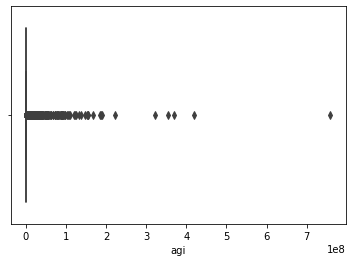

In [17]:
# Analyze uni-variate outliers,

# We will use agi, income, payments, and liability variables.
sns.boxplot(x=df['agi'])
plt.show()

# There is a very distant point in the 4 variables. This is an outlier.
# Also, we can see three other points far away. They are also outliers.

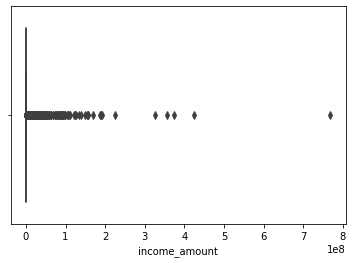

In [18]:
sns.boxplot(x=df['income_amount'])

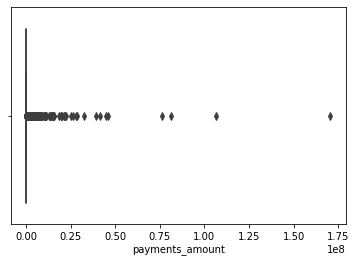

In [19]:
sns.boxplot(x=df['payments_amount'])

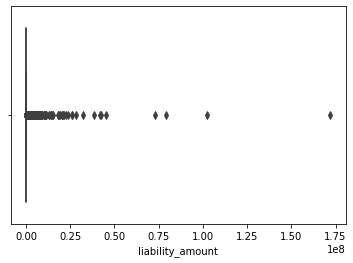

In [20]:
sns.boxplot(x=df['liability_amount'])

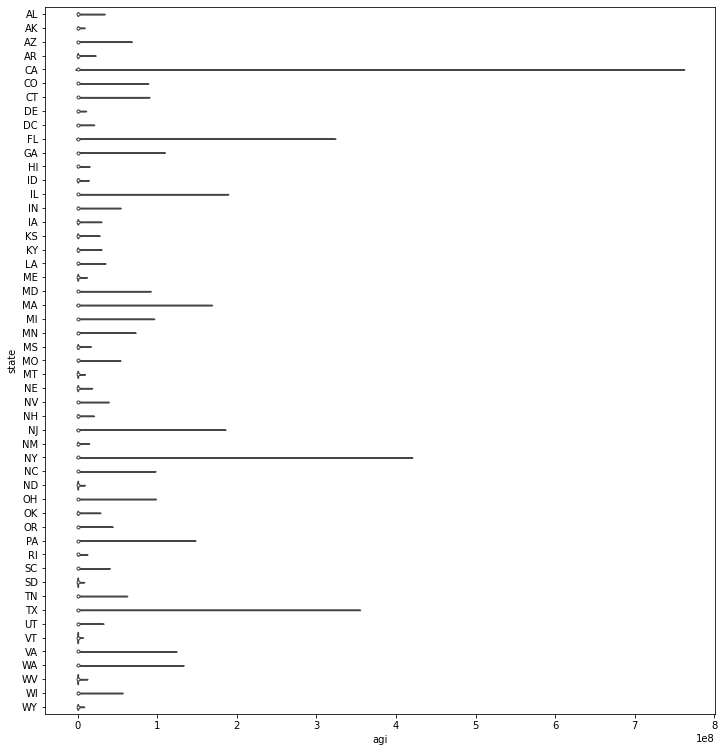

In [21]:
# We are going to investigate why we found the same outliers with 4 different variables,
# We will do multivariate outlier analysis.
# We will use a categorical variable, state, with the continuous variable, agi, income_amount, payments_amount, and liability_amount.

dims = (12, 13)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(ax=ax, data=df, y=df["state"], x=df["agi"])

# As we see, the plot again shows one distant data point with the 4 variables.
# Also, we can see again the other three distant data points.

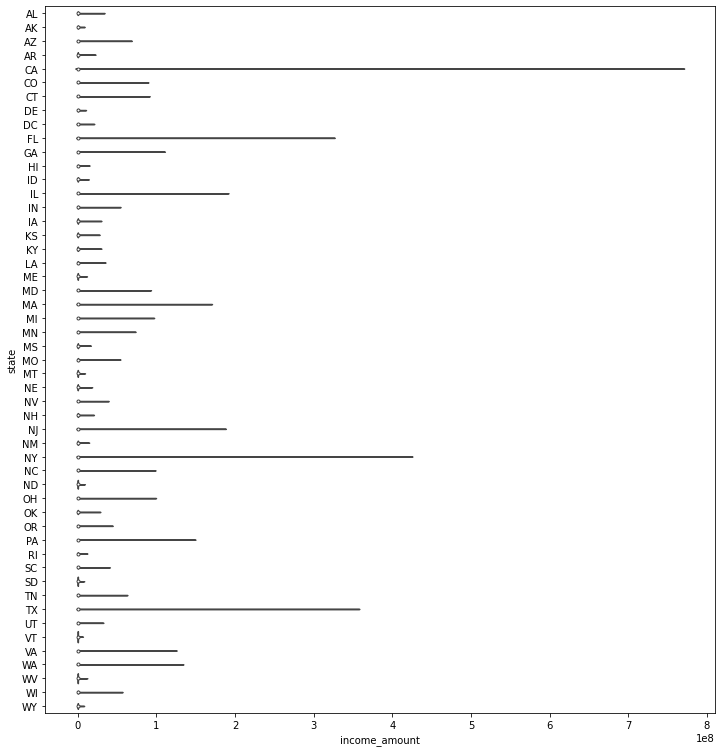

In [22]:
dims = (12, 13)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(ax=ax, data=df, y=df["state"], x=df["income_amount"])

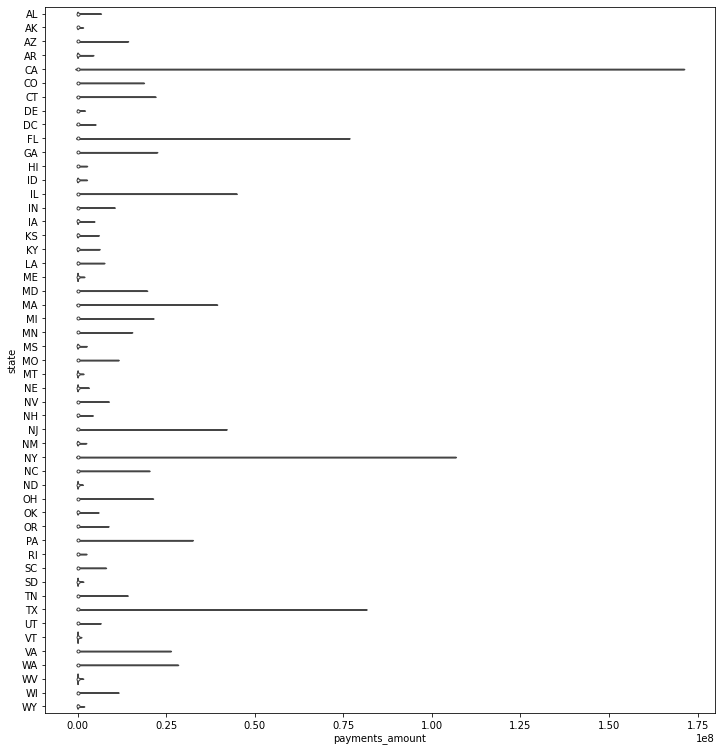

In [23]:
dims = (12, 13)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(ax=ax, data=df, y=df["state"], x=df["payments_amount"])

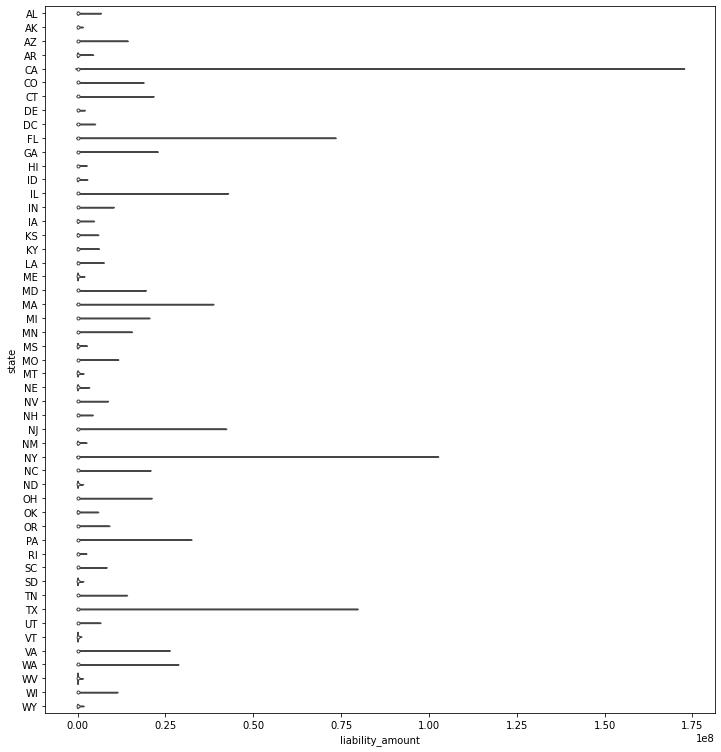

In [24]:
dims = (12, 13)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(ax=ax, data=df, y=df["state"], x=df["liability_amount"])

In [25]:
# We have identified the outliers,

# The very distant point is the CA state. 
# This state has the highest agi, income, payments, and liability in the USA.
# Also, we can see three other points far away. The other outliers are FL, NY, and TX state.


# We are going to investigate these outliers with mathematical function.
# We can use Z-Score to identify how many outliers there are in our data.
# The Z-Score is the number of standard deviations above the mean of a data point.


In [26]:
# Again, we will take the agi, income, payments, and liability variables to calculate Z-Score.
# Then, we will take data points that are 7 or more Z-Score away from the mean:

# Calculate Z-Score:
df2 = df[['agi', 'income_amount', 'payments_amount', 'liability_amount']]
z = np.abs(stats.zscore(df2))
print(np.where(z > 7))

(array([     4,      4,      5,      5,      5,      5,   3793,   3793,
         3794,   3794,   3795,   3795,   3796,   3796,   3796,   3796,
         3797,   3797,   3797,   3797,   8483,   8483,   8483,   8484,
         8484,   8484,   8484,   8485,   8485,   8485,   8485,   8486,
         8486,   8486,   8486,   8487,   8487,   8487,   8487,   8488,
         8488,   8488,   8488,  17351,  17351,  17352,  17352,  17354,
        17354,  17354,  17354,  17355,  17355,  17355,  17355,  19712,
        19712,  19712,  19712,  19713,  19713,  19713,  19713,  21639,
        21639,  21778,  21778,  21778,  21779,  21779,  21779,  21779,
        21780,  21780,  21780,  21780,  21781,  21781,  21781,  21781,
        21782,  21782,  21782,  21782,  21783,  21783,  21783,  21783,
        27299,  27299,  27300,  27300,  27301,  27301,  27302,  27302,
        27302,  27302,  27303,  27303,  27303,  27303,  32956,  32956,
        32957,  32957,  32957,  32958,  32958,  32958,  32959,  32959,
     

In [27]:
# The Z-Score analysis is:
# Because the first array contains the list of row numbers and 
# the second array respective contains the variable number, the first Z-Score is:

print(z[4][0])

# This means that row number 4 for the agi variable has a Z-Score of 9.97

9.967597956321391


In [28]:
# These outliers in our dataset are not bad data.
# They significantly influence the annual tax collection and we have to keep them.
# Therefore, we have to normalize them to a standard range prior to fit a machine learning model.

In [29]:
# Convert Categorical data into numbers.
# Because prediction models only accept numerical data, we have to convert the state variable,

# Convert state variable into numbers,
df['state'] = df['state'].astype('category')
df['state_cat'] = df['state'].cat.codes
mystate_cat = df["state_cat"]
df.head()

,state,zipcode,agi_range,returns_cnt,single,joint,head,efile,paper,exemption_cnt,dependent_cnt,agi,withincome_cnt,income_amount,withwages_cnt,wages_amount,withcredits_cnt,credits_amount,withchildcredits_cnt,childcredits_amount,withpayments_cnt,payments_amount,withliability_cnt,liability_amount,withoverpayment_cnt,overpayment_amount,farmer_elderly,state_cat
0,AL,99999,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,1180240.0,439980.0,10119915.0,768120.0,10261015.0,611200.0,8093820.0,138350.0,48039.0,7130.0,2561.0,705730.0,1956009.0,298790.0,272245.0,669420.0,1732176.0,153430.0,1
1,AL,99999,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,977450.0,348420.0,18156451.0,503430.0,18322144.0,432240.0,14986384.0,252860.0,306377.0,30100.0,18147.0,490520.0,1960001.0,376800.0,834109.0,424280.0,1230668.0,121610.0,1
2,AL,99999,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,587740.0,182370.0,16867358.0,274590.0,17015570.0,233850.0,12992584.0,127700.0,284052.0,17330.0,9633.0,270000.0,1599388.0,253380.0,1178827.0,205830.0,562490.0,88760.0,1
3,AL,99999,4,174830.0,35560.0,123370.0,12700.0,159190.0,6830.0,429360.0,131170.0,15167919.0,174830.0,15290801.0,149100.0,11296908.0,83340.0,234812.0,14600.0,8500.0,172760.0,1521941.0,171510.0,1250551.0,126560.0,403410.0,61450.0,1
4,AL,99999,5,245150.0,25990.0,207950.0,6480.0,224280.0,10500.0,665630.0,213100.0,33353413.0,245150.0,33654113.0,214430.0,24346118.0,134730.0,386690.0,23670.0,13839.0,242910.0,3980479.0,244190.0,3827935.0,145780.0,598498.0,89700.0,1



### Predictive Analytics:


In [30]:
# Divide the data into Train and Test.

# Train data will be used to train the prediction model. It will have 1/3 data.
# Test data will be used to assess how well our prediction model was trained. It will have 2/3 data.

# We are going to use the Train data for training our model,
X_final = df[['agi', 'income_amount', 'wages_amount', 'credits_amount', 'childcredits_amount']]
y_final = df['payments_amount']
X_train, X_test, y_train, y_test = train_test_split(X_final, 
                                                    y_final, 
                                                    test_size = 0.33,
                                                    random_state = 0)

In [31]:
# Normalize data.

# We are going to normalize the variables X. The target values Y is not required,

In [32]:
n_scaler = MinMaxScaler()

In [33]:
X_train = n_scaler.fit_transform(X_train.astype(np.float))

In [39]:
X_test = n_scaler.transform(X_test.astype(np.float))

In [40]:
# Linear Regression Model,


In [41]:
lr = LinearRegression().fit(X_train, y_train)

In [42]:
y_train_pred = lr.predict(X_train)

In [43]:
y_test_pred = lr.predict(X_test)

In [44]:
# Score,

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (lr.score(X_train,y_train), lr.score(X_test, y_test)))


lr.coef_: [-3.87719617e+09  4.18906925e+09 -1.34700369e+08 -7.65452257e+06
 -4.24792504e+06]
lr.intercept_: -1001.1188635691906
lr train score 0.994, lr test score: -0.003


In [45]:
# The Test score is 99%

In [46]:
from sklearn.ensemble import RandomForestClassifier
classfier = RandomForestClassifier(n_estimators=30, random_state=0)

In [47]:
#from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5 )

In [48]:
from sklearn.tree import DecisionTreeClassifier as dt
clf=dt()

In [49]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
X = df.iloc[:,0:len(df.columns)-1].values
Y = df.iloc[:,-1].values

In [51]:
X.shape

(165935, 27)

In [52]:
Y.shape

(165935,)

In [53]:
scores= cross_val_score(clf, X_train, y_train, cv=5, scoring ='f1_macro')
scores.mean()

NameError: name 'cross_val_score' is not defined

In [54]:
plot_decision_tree(clf, train_cols, target_cols)

NameError: name 'plot_decision_tree' is not defined

In [55]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=5, n_estimators=100)

In [57]:
rf.fit(X_train, y_train)

MemoryError: could not allocate 6988759040 bytes

In [58]:
rf.score(X_test, y_test)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [59]:
#The following 2 code cells also calculate the accuracy score of the RF model in predicting the test data (X_test) but performs it in 2 steps using rf.predict() and accuracy_score() functions.
Y_pred = rf.predict(X_test)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [ ]:
accuracy_score(y_pred, y_test)

In [60]:
y_pred, y_test

NameError: name 'y_pred' is not defined

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [63]:
grid.fit(X_train, y_train)

C:\Users\shefe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shefe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: could not allocate 3357016064 bytes

In [64]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'